# Keystrokes example
## Data preprocess

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

vis_dir = "./assets/Keystrokes/visualizations/"
if not os.path.exists(vis_dir):
    os.makedirs(vis_dir)

2520 -58
5244 -499
2144 -375
8009 -317
2283 -9176
9680 -344
5695 -144
5509 -152
10865 -141
3780 -169


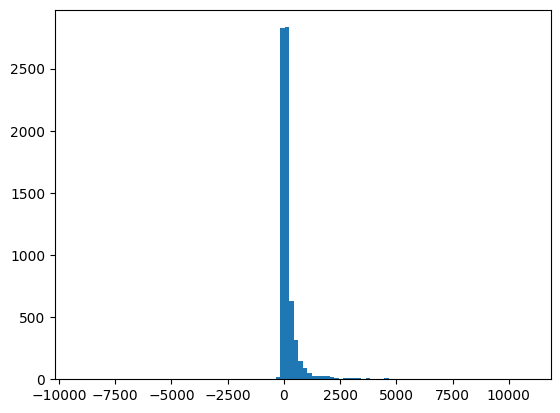

7160

In [2]:
ids = [27252, 36718, 56281, 64663, 67159, 97737, 145007, 159915, 264420, 271802]

inter_stroke_times = []
for id in ids:
    filename = "pn4874/%d_keystrokes.txt" % id

    df = pd.read_csv(filename, sep="\t")
    inter_stroke_time = np.array(df["PRESS_TIME"][1:])-np.array(df['RELEASE_TIME'][:-1])
    inter_stroke_times += inter_stroke_time.tolist()
    print(max(inter_stroke_time), min(inter_stroke_time))
plt.hist(inter_stroke_times, bins=100)
plt.show()
len(inter_stroke_times)

In [3]:
fname = "pn4874/inter_stroke_time.txt"
np.savetxt(fname, inter_stroke_times)

---

## Plot result

In [4]:
from scipy.interpolate import splev, splrep
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def draw_plots1D(generated, true, label):
        
    binsize = 2000        
    fig_scale = 3
    
    xlim = 15000
    xlim_min = 1.0
    
    # Scatter plot
    plt.figure(figsize=(fig_scale,fig_scale)) 
    plt.xscale('log')
    plt.yscale('log')
    h = plt.hist(true[:,0], alpha=0.9,cumulative=-1, density=True, bins=binsize, color='white')
    
    spl = splrep(h[1][1:], h[0], s=0.01, per=False)
    x2 = np.linspace(h[1][1], h[1][-1], 200)
    y2 = splev(x2, spl)
    plt.loglog(x2, y2, 'r-', linewidth=2.0, alpha=0.6, label='true')
    
    if h[1][1]>xlim_min:
        plt.loglog(np.linspace(xlim_min, h[1][1], 10), np.ones(10), 'r-', linewidth=2.0, alpha=0.6)

    h_gen = plt.hist(generated[:,0], label="generated", alpha=1.0 , cumulative=-1, density=True, bins=binsize, color = 'slategray')
    #plt.legend(fontsize=11, loc='lower left')   
        
    if h_gen[1][0]>xlim_min:
        plt.axvspan(xlim_min, h_gen[1][0], alpha=1.0, color = 'slategray')
    
    plt.xlim([xlim_min, xlim])
    plt.ylim([1e-3, 1.0])
    plt.xlabel('r')
    plt.ylabel('rCCDF')
    plt.tight_layout()
    plt.savefig(f"{vis_dir}{label.replace(' ', '_')}.png")
    plt.show()


alpha=02.00-Lip=1 GPA


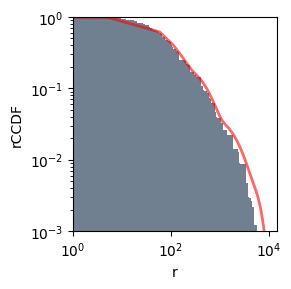

In [6]:
# GPA (Light to Heavy)

fs = ['alpha=02.00',]# 'reverse_KL', ]
#beta1 = 'infty'
#beta2 = df + d

for f in fs:
    if f in ['KL', 'reverse_KL']:
        alias_f = f + '=02.00'
    else:
        alias_f = f
    filename = "assets/Keystrokes/%s-Lipschitz_1.0000_7160_10000_00_3.pickle" % (alias_f)
    
    with open(filename, "rb") as fr:
        param, result = pickle.load(fr)
        
    print(f"{f}-Lip=1 GPA")
    draw_plots1D(np.abs(result['trajectories'][-1]), np.abs(param['X_']), f"Real {f}-Lip=1 GPA")



alpha=02.00 GPA


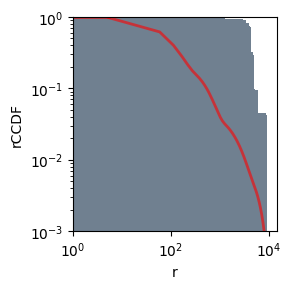

In [7]:
# GPA (Light to Heavy)

fs = ['alpha=02.00',]# 'reverse_KL', ]
#beta1 = 'infty'
#beta2 = df + d

for f in fs:
    if f in ['KL', 'reverse_KL']:
        alias_f = f + '=02.00'
    else:
        alias_f = f
    filename = "assets/Keystrokes/%s-Lipschitz_inf_7160_10000_00_3.pickle" % (alias_f)
    
    with open(filename, "rb") as fr:
        param, result = pickle.load(fr)
        
    print(f"{f} GPA")
    draw_plots1D(np.abs(result['trajectories'][-1]), np.abs(param['X_']), f"Real {f} GPA")



alpha=02.00-Lip=1 GAN


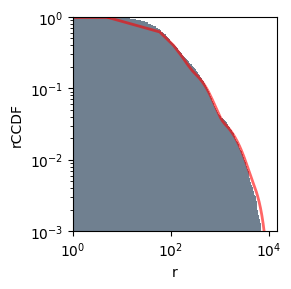

In [8]:
# GAN (Light to Heavy)

fs = ['alpha=02.00',]# 'reverse_KL', ]
#beta1 = 'infty'
#beta2 = df + d

for f in fs:
    if f in ['KL', 'reverse_KL']:
        alias_f = f + '=02.00'
    else:
        alias_f = f
    filename = "assets/Keystrokes/%s-Lipschitz_1.0000_GAN_df1.00_7160samples_0.pickle" % f

    
    with open(filename, "rb") as fr:
        [generated] = pickle.load(fr)
        
    print(f"{f}-Lip=1 GAN")
    draw_plots1D(np.abs(generated), np.abs(param['X_']), f"Real {f}-Lip=1 GAN")



alpha=02.00 GAN


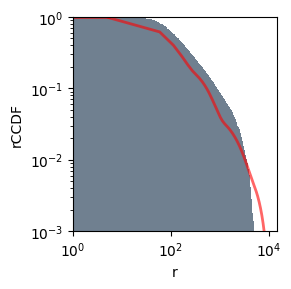

In [9]:
# GAN (Light to Heavy)

fs = ['alpha=02.00',]# 'reverse_KL', ]
#beta1 = 'infty'
#beta2 = df + d

for f in fs:
    if f in ['KL', 'reverse_KL']:
        alias_f = f + '=02.00'
    else:
        alias_f = f
    filename = "assets/Keystrokes/%s-Lipschitz_inf_GAN_df1.00_7160samples_0.pickle" % f

    
    with open(filename, "rb") as fr:
        [generated] = pickle.load(fr)
        
    print(f"{f} GAN")
    draw_plots1D(np.abs(generated), np.abs(param['X_']), f"Real {f} GAN")



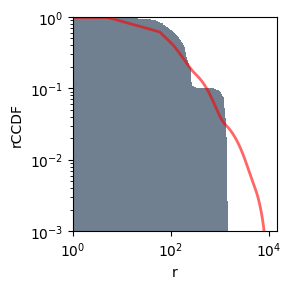

In [10]:
# OT flow
filename = "assets/Keystrokes/otflow_7160samples.pickle"
with open(filename, "rb") as fr:
    [normalized, generated] = pickle.load(fr)

draw_plots1D(np.abs(generated), np.abs(param['X_']), "Real OT flow T=50")


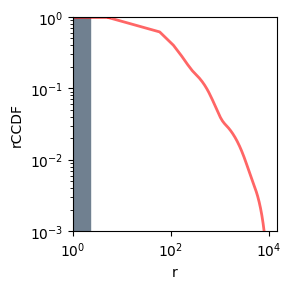

In [11]:
# Normalizing flow
filename = "assets/Keystrokes/no_otflow_7160samples.pickle"
with open(filename, "rb") as fr:
    [normalized, generated] = pickle.load(fr)

draw_plots1D(np.abs(generated), np.abs(param['X_']), "Real CNF T=50")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesI

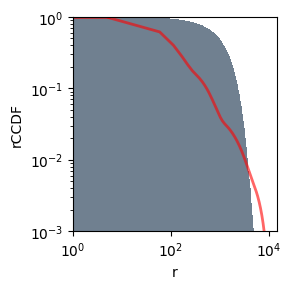

In [12]:
# VE SGM
filename = "assets/Keystrokes/ve_sgm_7160samples.pickle"
with open(filename, "rb") as fr:
    ou_normal, ou_reverse = pickle.load(fr)

draw_plots1D(np.abs(ou_reverse), np.abs(param['X_']), f"Real VE SGM")
